In [1]:
"""
This project is created for the Udacity program purpose
@author: hotronghai
"""


'\nThis project is created for the Udacity program purpose\n@author: hotronghai\n'

In [2]:

import pandas as pd
from IPython.display import display
from pandas import Series

df_cal = pd.read_csv('./boston_data/calendar.csv')
df_listing = pd.read_csv('./boston_data/listings.csv')
df_review = pd.read_csv('./boston_data/reviews.csv')

print("Calendar sample data: ")
display(df_cal.head())

print("Listing sample data: ")
display(df_listing.head())

print("Reviews sample data: ")
display(df_review.head())

Calendar sample data: 


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


Listing sample data: 


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


Reviews sample data: 


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [3]:
from abc import ABC, abstractmethod
from pandas.core.arrays.categorical import factorize_from_iterable
import pickle
import numpy as np
import copy


class OpDataFrame(ABC):
    def __init__(self, op_name, ignore_if_failure=False):
        self.op_name = op_name
        self.ignore_if_failure = ignore_if_failure

    @abstractmethod
    def op(self, _df: pd.DataFrame):
        return _df

    def get_info(self):
        if hasattr(self, "field"):
            return f"{self.op_name}: {self.field}"
        return self.op_name

    # def __eq__(self, obj):
    #     return isinstance(obj, OpDataFrame) and (obj.op_name == self.op_name) and hasattr(obj, "field") and hasattr(self, "field") and (obj.field == self.field)


class OpConvertDate(OpDataFrame):
    """
    Get datetime values from the date fields from data frame
    """

    def __init__(self, field):
        super(OpConvertDate, self).__init__(op_name="OpConvertDate")
        self.field = field

    def op(self, _df: pd.DataFrame):
        _df[self.field] = pd.to_datetime(_df[self.field])
        return _df


class OpConvertBoolean(OpDataFrame):
    """
    Convert columns `field` in dataframe `_df` into boolean value.
    """

    def __init__(self, field, t_value='t'):
        super(OpConvertBoolean, self).__init__(op_name="OpConvertBoolean")
        self.field = field
        self.t_value = t_value

    def op(self, _df: pd.DataFrame):
        _df[self.field] = _df[self.field].astype(str) == self.t_value
        return _df


class OpConvertMoneyToFloat(OpDataFrame):
    """
    Convert money with sign $ to float value
    """

    def __init__(self, field):
        super(OpConvertMoneyToFloat, self).__init__(op_name="OpConvertMoneyToFloat")
        self.field = field
        # self.money_sign = money_sign

    def op(self, _df: pd.DataFrame):
        _df[self.field] = _df[self.field].replace('[\$,]', '', regex=True).astype(float)
        return _df


class OpConvertToFloat(OpDataFrame):
    """
    Convert value to float
    """

    def __init__(self, field):
        super(OpConvertToFloat, self).__init__(op_name="OpConvertToFloat")
        self.field = field

    def op(self, _df: pd.DataFrame):
        _df[self.field] = _df[self.field].astype(float)
        return _df


class OpConvertPercentToFloat(OpDataFrame):
    """
    Convert percent values to float (Ex 80% = 0.8)
    """

    def __init__(self, field):
        super(OpConvertPercentToFloat, self).__init__(op_name="OpConvertPercentToFloat")
        self.field = field

    def op(self, _df: pd.DataFrame):
        _df[self.field] = _df[self.field].str.rstrip('%').astype('float') / 100.0
        return _df


class OpConvertToString(OpDataFrame):
    def __init__(self, field):
        super(OpConvertToString, self).__init__(op_name="OpConvertToString")
        self.field = field

    def op(self, _df: pd.DataFrame):
        _df[self.field] = _df[self.field].astype('string')
        return _df


class OpDropColumns(OpDataFrame):
    def __init__(self, fields):
        super(OpDropColumns, self).__init__(op_name="OpDropColumns")
        self.fields = fields

    def op(self, _df: pd.DataFrame):

        _column_deleting = list(set(self.fields) & set(_df.columns))
        _df = _df.drop(labels=_column_deleting, axis=1)

        return _df


class OpDropColumnsWithUniqueValue(OpDataFrame):
    def __init__(self):
        super(OpDropColumnsWithUniqueValue, self).__init__(op_name="OpDropColumnWithUniqueValue")

    def op(self, _df: pd.DataFrame):
        _df = _df.drop(labels=detect_columns_with_unique_values(_df), axis=1)

        return _df


class OpFieldMapping(OpDataFrame):
    def __init__(self, field, dic_map):
        super(OpFieldMapping, self).__init__(op_name="OpFieldMapping")
        self.field = field
        self.dic_map = dic_map

    def _map_func(self, field):
        return self.dic_map[title(field)] if title(field) in self.dic_map else title(field)

    def op(self, _df: pd.DataFrame):
        _df[self.field] = _df[self.field].astype(str).apply(trim).apply(self._map_func)
        return _df


class CanSave(object):
    def __init__(self, save_path):
        self.save_path = save_path

    def save(self, data):
        if self.save_path:
            with open(self.save_path, 'wb') as f:
                pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

class CanLoad(object):
    def __init__(self, load_path):
        self.load_path = load_path

    def load(self):
        if self.load_path:
            with open(self.load_path, 'rb') as f:
                return pickle.load(f)


class CategoryDummy(object):
    def __init__(self):
        pass

    def _get_index(self, labels, code_name):
        def _get_nan_index():
            for i, v in enumerate(labels):
                if np.isnan(v):
                    return i

        if isinstance(code_name, (float, int)):
            if np.isnan(code_name):
                return _get_nan_index()

        for i, v in enumerate(labels):
            if v == code_name:
                return i

        return _get_nan_index()

    def codes_labels(self, series: pd.Series):
        codes, labels = factorize_from_iterable(series)

        codes = codes.copy()
        # Dummy na is default
        codes[codes == -1] = len(labels)
        levels = np.append(labels, np.nan)

        return codes, levels

    def _dummy(self, codes, labels, prefix="_"):
        dummy_cols = [f"{prefix}{label}" for label in labels]

        dummy_mat = np.eye(len(labels), dtype=np.uint8).take(codes, axis=0)
        dummy_mat[codes == -1] = 0

        # drop_first:
        dummy_mat = dummy_mat[:, 1:]
        dummy_cols = dummy_cols[1:]
        return pd.DataFrame(dummy_mat, columns=dummy_cols)

    def dummy_by_specified_labels(self, labels, code_labels, prefix="_"):
        codes = [self._get_index(labels, name) for name in code_labels]
        return self._dummy(codes, labels, prefix)

    def dummy_by_all_codes(self, codes, labels, prefix="_"):
        return self._dummy(codes, labels, prefix)


class OpSaveCategoryColumns(OpDataFrame, CanSave):
    def __init__(self, cat_cols, save_path):
        OpDataFrame.__init__(self, op_name="OpSaveCategoryColumns")
        CanSave.__init__(self, save_path=save_path)
        self.cat_cols = cat_cols

    def op(self, _df: pd.DataFrame):

        dummier = CategoryDummy()
        d = {}

        for cat_col in self.cat_cols:
           d[cat_col] = dummier.codes_labels(_df[cat_col])

        self.save(d)

        return _df

class OpLoadCategoryColumns(OpDataFrame, CanLoad):
    def __init__(self, cat_cols, load_path):
        OpDataFrame.__init__(self, op_name="OpLoadCategoryColumns")
        CanLoad.__init__(self, load_path=load_path)

        self.cat_cols = cat_cols

    def op(self, _df: pd.DataFrame):

        dummier = CategoryDummy()
        d = self.load()

        for cat_col in self.cat_cols:
            _, labels = d[cat_col]

            _df_col_cat = dummier.dummy_by_specified_labels(labels, _df[cat_col].values, prefix=f"{cat_col}_")
            _df = pd.concat([_df.reset_index(drop=True), _df_col_cat.reset_index(drop=True)], axis=1)

        return _df

class OpGroupbyExpander(OpDataFrame):
    def __init__(self, group_fields, funcs=['mean', 'max', 'min']):
        super(OpGroupbyExpander, self).__init__(op_name="OpGroupbyExpander")
        self.group_fields = group_fields
        # self.compute_field = compute_field
        self.funcs = funcs

    def op(self, _df: pd.DataFrame):
        compute_fields = _df.select_dtypes(include=['float', 'int']).columns

        for compute_field in compute_fields:
            _g_df = _df.groupby(by=self.group_fields).agg(
                {compute_field: self.funcs}
            )

            _df = pd.merge(_df, _g_df, on=self.group_fields)

        return _df


class OpFeatureComposedExpander(OpDataFrame):
    def __init__(self):
        super(OpFeatureComposedExpander, self).__init__(op_name="OpFeatureComposedExpander")
        # self.num_cols = num_cols

    def op(self, _df: pd.DataFrame):

        num_cols = _df.select_dtypes(include=['float', 'int', 'int64'])

        for col_1 in num_cols:
            for col_2 in num_cols:
                _df[f"{col_1}_and_{col_2}"] = _df[col_1] * _df[col_2]

        return _df


class OpPipeLine(OpDataFrame):
    """
    Create pipeline of operation on the dataframe
    """

    def __init__(self, copy=True):
        super(OpPipeLine, self).__init__(op_name="OpPipeLine")
        self.copy = copy
        self.ops = []

    def add_op(self, op):
        self.ops.append(op)

    def remove_op(self, removed_op_name):

        self.ops = [x for x in self.ops if x.op_name != removed_op_name]

    def replace_op(self, new_node_op):
        for i, node_op in enumerate(self.ops):
            if node_op.op_name == new_node_op.op_name and node_op.field == new_node_op.field:
                self.ops[i] = new_node_op

    def add_ops(self, ops):
        self.ops.extend(ops)

    def op(self, _df: pd.DataFrame):
        if self.copy:
            _df = _df.copy()

        for node_op in self.ops:
            try:
                _df = node_op.op(_df)
            except Exception as e:
                if not node_op.ignore_if_failure:
                    print(e)
                    raise Exception(f"Error when doing op: {node_op.get_info()}. Detail error: {e}")
                continue
        return _df

    def get_info(self):
        return " >> ".join([op.get_info() for op in self.ops])


class OpMergeDataFrame(OpDataFrame):
    """
    Merge 2 dataframes
    """

    def __init__(self, _df_main, left_on, right_on, how='inner'):
        super(OpMergeDataFrame, self).__init__(op_name="OpMergeDataFrame")
        self._df_main = _df_main
        self.how = how
        self.left_on = left_on
        self.right_on = right_on

    def op(self, _df: pd.DataFrame):
        return pd.merge(self._df_main, _df, how=self.how, left_on=self.left_on, right_on=self.right_on)


class OpAddMonthColumn(OpDataFrame):
    def __init__(self, field, new_month_field="_month"):
        super(OpAddMonthColumn, self).__init__(op_name="OpAddMonthColumn")
        self.field = field
        self.new_month_field = new_month_field

    def op(self, _df: pd.DataFrame):
        _df[self.new_month_field] = _df[self.field].dt.month
        return _df


class OpSaveMeanColumns(OpDataFrame, CanSave):
    def __init__(self, save_path):
        OpDataFrame.__init__(self, op_name="OpSaveMeanColumn")
        CanSave.__init__(self, save_path)


    def op(self, _df: pd.DataFrame):
        mean_cols = get_columns_numeric_with_na(_df)
        d = {col: _df[col].mean() for col in mean_cols}
        self.save(d)

        return _df

class OpLoadMeanColumns(OpDataFrame, CanLoad):
    def __init__(self, load_path):
        OpDataFrame.__init__(self, op_name="OpLoadMeanColumns")
        CanLoad.__init__(self, load_path)

    def op(self, _df: pd.DataFrame):
        d = self.load()

        for col, col_mean in d.items():
            _df[col] = _df[col].fillna(col_mean)

        return _df



# class OpFillMeanColumn(OpDataFrame):
#     def __init__(self, field):
#         super(OpFillMeanColumn, self).__init__(op_name="OpFillMeanColumn")
#         self.field = field
#
#     def op(self, _df: pd.DataFrame):
#         _df[self.field] = _df[self.field].fillna(_df[self.field].mean())
#         return _df


class OpSelectNumericColumnOnly(OpDataFrame):
    def __init__(self):
        super(OpSelectNumericColumnOnly, self).__init__(op_name="OpSelectNumericColumnOnly")

    def op(self, _df: pd.DataFrame):
        choose_cols = ['float', 'int', 'int64', 'bool', 'uint8']
        return _df.select_dtypes(include=choose_cols)


def detect_columns_with_unique_values(_df):
    """
    Get the columns with unique values.
    :param _df: Give dataframe
    :return: List of column name containing unique value
    """
    return [col for col in _df.columns if len(_df[col].unique()) == 1]


def trim(s):
    """
    Trim left and right string `s`
    :param s: Given string
    :return: Trimmed string
    """
    return s.strip()


def title(s):
    """
    Upper case of the first letter in words
    :param s: Given string
    :return: Titled string
    """
    return s.title()


def get_columns_numeric_with_na(_df):
    """
    Get columns with numeric having na values
    :param _df: Given dataframe
    :return: List of columns
    """
    columns_with_na = set([col for col in _df.columns if any(_df[col].isna())])
    columns_with_numeric = set(_df.select_dtypes(include=['float', 'int', 'int64']).columns)

    return list(columns_with_na & columns_with_numeric)


pipeline_cal = OpPipeLine(copy=False)

pipeline_cal.add_op(OpConvertDate('date'))
pipeline_cal.add_op(OpConvertBoolean('available'))
pipeline_cal.add_op(OpConvertMoneyToFloat('price'))

df_cal = pipeline_cal.op(df_cal)

print(df_cal.dtypes)


listing_id             int64
date          datetime64[ns]
available               bool
price                float64
dtype: object


In [4]:
pipeline_listing = OpPipeLine(copy=True)

pipeline_listing.add_ops(
    [OpConvertToString(col) for col in
     ["listing_url", "name", "summary", "space", "description", "neighborhood_overview",
      "notes", "transit", "access", "interaction", "house_rules", "thumbnail_url",
      "medium_url", "picture_url", "xl_picture_url", "host_url", "host_about",
      "host_thumbnail_url", "host_picture_url", "street"]])

pipeline_listing.add_ops(
    [OpConvertBoolean(col) for col in ["host_is_superhost", "host_has_profile_pic", "host_identity_verified",
                                       "requires_license", "instant_bookable", "require_guest_profile_picture",
                                       "require_guest_phone_verification"]])

pipeline_listing.add_ops(
    [OpConvertMoneyToFloat(col) for col in
     ["price", "weekly_price", "monthly_price", "security_deposit", "cleaning_fee",
      "extra_people"]])

pipeline_listing.add_ops(
    [OpConvertDate(col) for col in ["last_scraped", "host_since", "calendar_last_scraped", "first_review",
                                    "last_review"]])

pipeline_listing.add_ops(
    [OpConvertPercentToFloat(col) for col in ["host_response_rate", "host_acceptance_rate"]])

pipeline_listing.add_op(OpFieldMapping(field='city',
                                       dic_map={
                                           "Boston (Charlestown)": "Charlestown",
                                           "Jamaica Plain (Boston)": "Jamaica Plain",
                                           "Jamaica Plain, Boston": "Jamaica Plain",
                                           "Jamaica plain": "Jamaica Plain",
                                           "Jamaica Plain, MA": "Jamaica Plain",
                                           "Boston (Jamaica Plain)": "Jamaica Plain",
                                           "Boston, Massachusetts, Us": "Boston",
                                           "East Boston": "Boston",
                                           "Dorchester, Boston": "Dorchester",
                                           "Roslindale, Boston": "Roslindale",
                                           "波士顿": "Boston",
                                           "South End, Boston": "Boston",
                                           "Mission Hill, Boston": "Boston"
                                       }
                                       ))

# pipeline_listing.add_op(OpDropColumns(fields=detect_columns_with_unique_values(df_listing)))

df_listing_cleaned = pipeline_listing.op(df_listing)

display(df_listing_cleaned['city'].value_counts())


Boston               3392
Roxbury Crossing       28
Jamaica Plain          25
Somerville             19
Brookline              18
Dorchester             16
Brighton               16
Cambridge              16
Charlestown            16
Allston                14
Roslindale              7
West Roxbury            5
Mattapan                3
Hyde Park               2
South Boston            2
Nan                     2
Newton                  1
Milton                  1
Watertown               1
Jamaica Plain, Ma       1
Name: city, dtype: int64

In [5]:


pipeline_cal_listing = OpPipeLine()

pipeline_cal_listing.add_op(OpMergeDataFrame(df_cal, left_on=['listing_id'], right_on=['id'], how='inner'))


pipeline_cal_listing.add_op(OpAddMonthColumn(field='date', new_month_field="_month"))

df_cal_listing = pipeline_cal_listing.op(df_listing_cleaned)

print(df_cal_listing)


         listing_id       date  available  price_x        id  \
0          12147973 2017-09-05      False      NaN  12147973   
1          12147973 2017-09-04      False      NaN  12147973   
2          12147973 2017-09-03      False      NaN  12147973   
3          12147973 2017-09-02      False      NaN  12147973   
4          12147973 2017-09-01      False      NaN  12147973   
...             ...        ...        ...      ...       ...   
1308885    14504422 2016-09-10      False      NaN  14504422   
1308886    14504422 2016-09-09      False      NaN  14504422   
1308887    14504422 2016-09-08      False      NaN  14504422   
1308888    14504422 2016-09-07      False      NaN  14504422   
1308889    14504422 2016-09-06      False      NaN  14504422   

                                   listing_url       scrape_id last_scraped  \
0        https://www.airbnb.com/rooms/12147973  20160906204935   2016-09-07   
1        https://www.airbnb.com/rooms/12147973  20160906204935   2016-09-

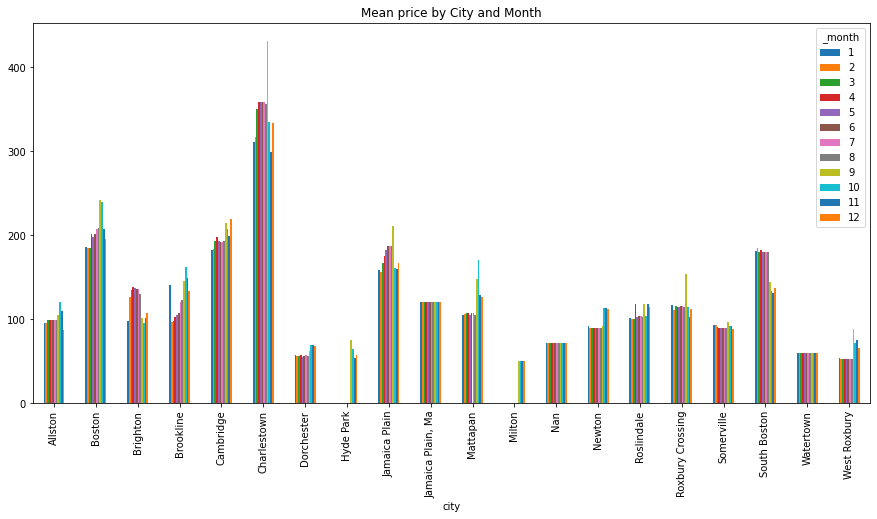

In [6]:
import matplotlib.pyplot as plt


def chart_price_by_city_and_month():
    """
    Draw a chart to visualize price and city by month
    :return: None
    """
    fig, ax = plt.subplots(figsize=(15, 7))
    plt.title("Mean price by City and Month")
    g_city_and_month = df_cal_listing.groupby(['city', '_month'])['price_x'].mean()
    g_city_and_month.unstack().plot(legend=True, kind='bar', ax=ax)

    plt.savefig('chart_price_by_city_and_month.png', dpi=100, bbox_inches='tight')


chart_price_by_city_and_month()




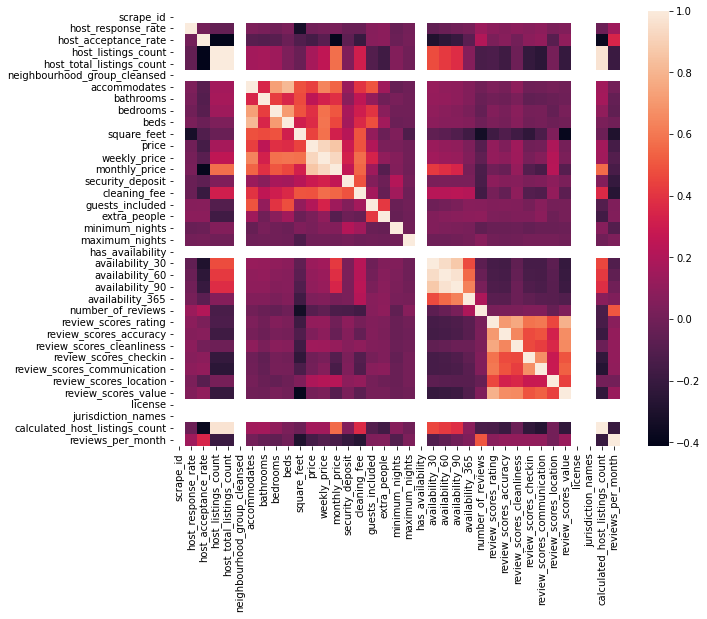

In [7]:
import seaborn as sns


def visualize_coeffs():
    """
    Visualize coeffs from numeric_df_listing data
    :return:
    """
    plt_1 = plt.figure(figsize=(10, 8))
    ignore_columns = ['id', 'host_id', 'latitude', 'longitude']
    numeric_df_listing = df_listing_cleaned.select_dtypes(include=['float', 'int', 'int64']).drop(labels=ignore_columns,
                                                                                                  axis=1)

    sns.heatmap(numeric_df_listing.corr(), xticklabels=True, yticklabels=True)
    plt.savefig('./images/headmap_cleaned_df_2.png', dpi=1000)


visualize_coeffs()





In [8]:
mean_path = './train/mean_col.txt'

pipeline_listing.add_op(OpSaveMeanColumns(mean_path))

pipeline_listing.add_op(OpLoadMeanColumns(mean_path))


# Try to training with the model with current number of features
# pipeline_listing.add_op(OpSelectNumericColumnOnly())

pipeline_listing.add_op(OpDropColumns(
    fields=['id', 'host_id', 'scrape_id', 'last_scraped', 'experiences_offered', 'neighbourhood_group_cleansed',
            'state', 'country_code', 'country', 'has_availability', 'calendar_last_scraped', 'requires_license',
            'license', 'jurisdiction_names']))




# pipeline_listing.add_op(OpDropColumnsWithUniqueValue())

df_listing_cleaned = pipeline_listing.op(df_listing)

df_listing_cleaned = OpSelectNumericColumnOnly().op(df_listing_cleaned)




pipeline_listing_base = copy.deepcopy(pipeline_listing)


In [9]:
from sklearn.model_selection import train_test_split


class DataManager(object):
    """
    Split dataset into 2 sets (training/test set)
    """

    def __init__(self, _df, test_size=0.2, shuffle=True):
        self._df = _df
        self.test_size = test_size
        self.shuffle = shuffle

        self.na_funcs = []

    def split_data(self, response_col):
        self._df = self._df.dropna(subset=[response_col], axis=0)

        if self.shuffle:
            self._df = self._df.sample(frac=1)

        X = self._df.drop(response_col, axis=1)
        y = self._df[response_col]
        _X_train, _X_test, _y_train, _y_test = train_test_split(X, y, test_size=self.test_size, random_state=37)

        return _X_train, _X_test, _y_train, _y_test


data_manager = DataManager(df_listing_cleaned, test_size=0.2, shuffle=True)
X_train, X_test, y_train, y_test = data_manager.split_data(response_col='price')

In [ ]:
# test_2 = [col for col in df_listing_cleaned.columns if any(df_listing_cleaned[col].isna())]
#
# print(test_2)
#
# for t in test_2:
#     print(df_listing_cleaned[t].value_counts())
#
#
# print(pipeline_listing.get_info())

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


def build_linear_regression_model():
    """
    Create a linear regression model object.
    :return:
    """
    return LinearRegression(normalize=True)


def train_model(model, X_train, y_train):
    """
    Training model with training set
    """
    model.fit(X_train, y_train)
    return model


def evaluate_model(model, X, y):
    """
    Evaluate the model with test set (X, y).
    :param model: Given model
    :param X: X input
    :param y: y label (true value)
    :return: r2_score
    """
    y_hat = model.predict(X)
    return r2_score(y, y_hat)


model = build_linear_regression_model()
model = train_model(model, X_train, y_train)

print(evaluate_model(model, X_train, y_train), evaluate_model(model, X_test, y_test))


def display_predict(X_test, y_test):
    y_hat = model.predict(X_test)
    display(pd.DataFrame(np.array([y_hat, y_test])))


display_predict(X_test, y_test)


0.40105932690613255 0.20740774339157253


,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
0,234.35239,300.328581,40.38177,150.956991,100.343083,200.98584,224.65745,225.927151,151.243804,115.510266,...,145.867997,144.76303,134.602101,97.658395,79.358044,75.102447,315.776365,99.302942,85.273689,175.570264
1,299.00000,349.000000,40.00000,247.000000,90.000000,200.00000,70.00000,179.000000,269.000000,150.000000,...,100.000000,62.00000,110.000000,79.000000,94.000000,70.000000,500.000000,100.000000,100.000000,143.000000


In [11]:


# We do the same pipeline as above.
pipeline_listing_expander = copy.deepcopy(pipeline_listing_base)


cat_path = './train/cat_present.txt'
cat_cols = ['city', 'bed_type', 'cancellation_policy']

pipeline_listing_expander.add_op(OpSaveCategoryColumns(cat_cols=cat_cols, save_path=cat_path))

pipeline_listing_expander.add_op(OpLoadCategoryColumns(cat_cols=cat_cols, load_path=cat_path))

pipeline_listing_expander.add_op(OpGroupbyExpander(group_fields='city'))

pipeline_listing_expander.add_op(OpFeatureComposedExpander())

# pipeline_listing_expander.add_op(OpSelectNumericColumnOnly())

df_listing_cleaned_expanded = pipeline_listing_expander.op(df_listing)
df_listing_cleaned_expanded = OpSelectNumericColumnOnly().op(df_listing_cleaned_expanded)


c:\users\haiht\appdata\local\programs\python\python37\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [12]:
data_manager = DataManager(df_listing_cleaned_expanded, test_size=0.2, shuffle=True)
X_train, X_test, y_train, y_test = data_manager.split_data(response_col='price')

model = build_linear_regression_model()
model = train_model(model, X_train, y_train)

print(evaluate_model(model, X_train, y_train), evaluate_model(model, X_test, y_test))


1.0 0.9996532313456123


In [13]:
our_house_request = df_listing[df_listing['city'] == 'West Roxbury'].head(1)
our_house_request['accommodates'] = 10

pipeline_listing_expander_predictor = copy.deepcopy(pipeline_listing_expander)
pipeline_listing_expander_predictor.remove_op('OpSaveMeanColumn')
pipeline_listing_expander_predictor.remove_op('OpSaveCategoryColumns')


our_house_request_data = pipeline_listing_expander_predictor.op(our_house_request)
our_house_request_data = OpSelectNumericColumnOnly().op(our_house_request_data)

our_house_request_data = our_house_request_data.drop(labels='price', axis=1)

print(model.predict(our_house_request_data))

c:\users\haiht\appdata\local\programs\python\python37\lib\site-packages\pandas\core\reshape\merge.py:648: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


[68.84220163]


In [ ]:
print("\n".join([op.op_name for op in pipeline_listing_expander.ops]))